<a href="https://colab.research.google.com/github/mehrnazeraeisi/Spectral-Clustering/blob/main/Implement_Spectral_Clustering_3Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video Address: https://www.youtube.com/watch?v=YHz0PHcuJnk

# Why should we use Spectral Clustering?

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
n_samples=1500
random_state=170
X,y=make_blobs(n_samples=n_samples ,random_state=random_state
              )


Text(0.5, 1.0, 'Unlabeled data')

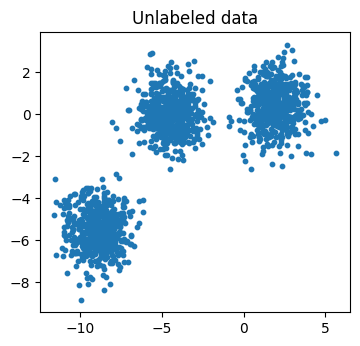

In [ ]:
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X[: , 0] , X[: , 1]  , s=10)
plt.title("Unlabeled data")

In [ ]:
# Anisotropicly distributed data

transformation=[[0.60834549  , -0.63667341] , [-0.40887718  , 0.85253229]]
X_aniso=np.dot(X ,transformation )

Text(0.5, 1.0, 'Unlabeled data')

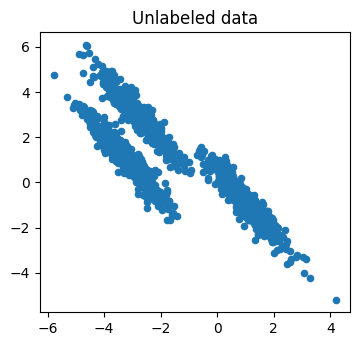

In [ ]:
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_aniso[: , 0] , X_aniso[: , 1]  , s=20)
plt.title("Unlabeled data")

Text(0.5, 1.0, 'Labels returned by KMeans')

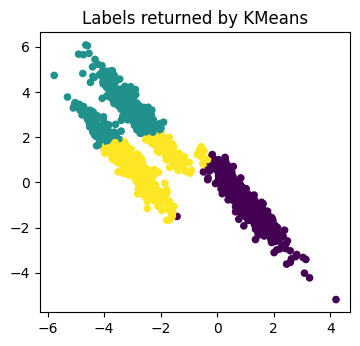

In [ ]:
y_pred= KMeans(n_clusters=3 , random_state=random_state).fit_predict(X_aniso)

plt.figure(figsize=(4,8))
plt.subplot(212)
plt.scatter(X_aniso[: , 0] , X_aniso[: , 1], c=y_pred   ,s=20)
plt.title("Labels returned by KMeans")

### Converting a one-dimensional array into a two-dimensional array

In [ ]:
A=np.array([[1,2,3],[4,5,6],[3,4,5]])
D1array=np.array([1,2,3])
D2array=D1array[:, np.newaxis]

AD=np.multiply(A, D2array)
print(AD)

print(D2array)

[[ 1  2  3]
 [ 8 10 12]
 [ 9 12 15]]
[[1]
 [2]
 [3]]


# Step 1 : Form similarity graph and find M


In [ ]:
from scipy.spatial import distance

rbf_param=7.6

# Find M
K=np.exp(-rbf_param*distance.cdist(X_aniso , X_aniso  , metric='sqeuclidean'))

D=K.sum(axis=1)
D=np.sqrt(1/D)

M=np.multiply( D[ np.newaxis , : ] , np.multiply ( K , D[ : , np.newaxis] ))


# Step 2 : Eigenvalue decomposition of M

In [ ]:
from scipy import linalg
from sklearn.preprocessing import normalize

# EVD of M
U, Sigma, _ = linalg.svd( M , full_matrices=False , lapack_driver='gesvd')

Usubset= U[ : , 0:3]
y_pred_sc = KMeans (n_clusters = 3).fit_predict(normalize(Usubset))

Text(0.5, 1.0, 'Labels returned by Spectral Clustering')

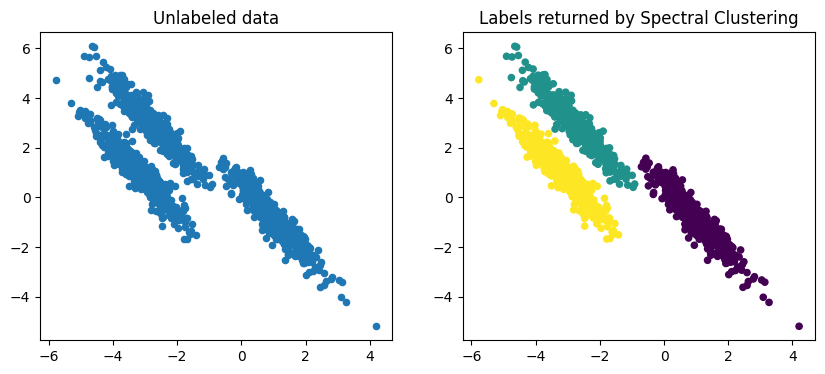

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X_aniso[ : , 0 ] , X_aniso[ : , 1 ] , s = 20)
plt.title("Unlabeled data")

plt.subplot(122)
plt.scatter(X_aniso[ : , 0 ] , X_aniso[ : , 1 ] , c=y_pred_sc  , s = 20)
plt.title("Labels returned by Spectral Clustering")

Text(0.5, 1.0, 'Labels returned by Spectral Clustering')

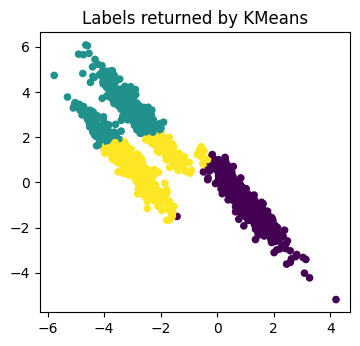

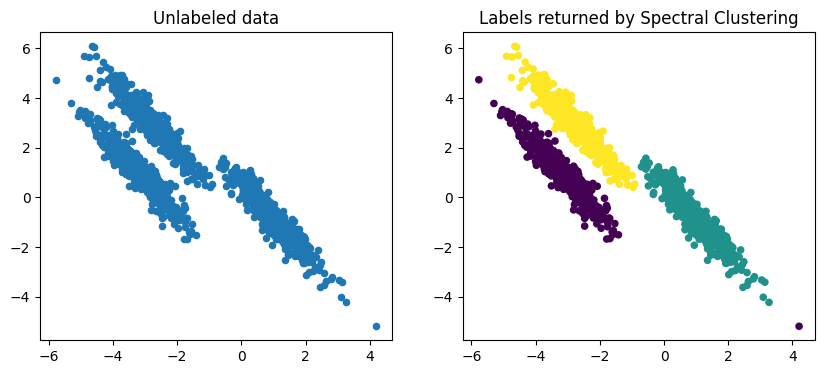

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs




n_samples=1500
random_state=170
X,y=make_blobs(n_samples=n_samples ,random_state=random_state
              )




# Anisotropicly distributed data

transformation=[[0.60834549  , -0.63667341] , [-0.40887718  , 0.85253229]]
X_aniso=np.dot(X ,transformation )



y_pred= KMeans(n_clusters=3 , random_state=random_state).fit_predict(X_aniso)

plt.figure(figsize=(4,8))
plt.subplot(212)
plt.scatter(X_aniso[: , 0] , X_aniso[: , 1], c=y_pred   ,s=20)
plt.title("Labels returned by KMeans")




from scipy.spatial import distance

rbf_param=7.6

# Find M
K=np.exp(-rbf_param*distance.cdist(X_aniso , X_aniso  , metric='sqeuclidean'))

D=K.sum(axis=1)
D=np.sqrt(1/D)

M=np.multiply( D[ np.newaxis , : ] , np.multiply ( K , D[ : , np.newaxis] ))



from scipy import linalg
from sklearn.preprocessing import normalize

# EVD of M
U, Sigma, _ = linalg.svd( M , full_matrices=False , lapack_driver='gesvd')

Usubset= U[ : , 0:3]
y_pred_sc = KMeans (n_clusters = 3).fit_predict(normalize(Usubset))



plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X_aniso[ : , 0 ] , X_aniso[ : , 1 ] , s = 20)
plt.title("Unlabeled data")

plt.subplot(122)
plt.scatter(X_aniso[ : , 0 ] , X_aniso[ : , 1 ] , c=y_pred_sc  , s = 20)
plt.title("Labels returned by Spectral Clustering")

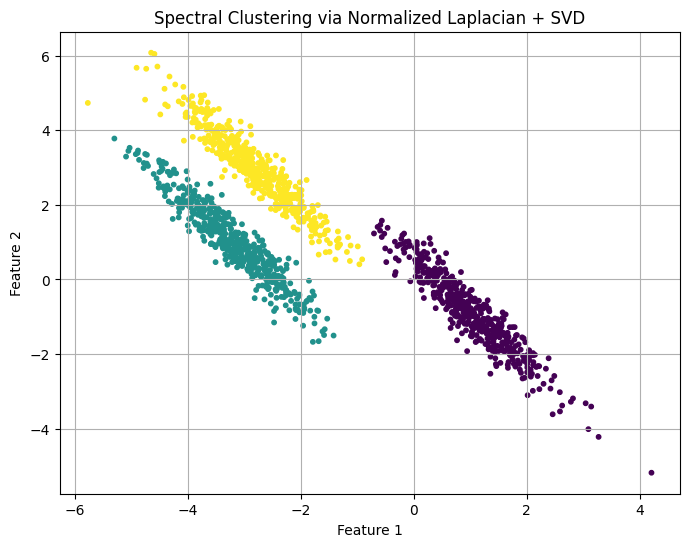

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from scipy.sparse.csgraph import laplacian
from scipy import linalg

# --- تولید داده با تغییر شکل (anisotropic) ---
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# --- ساخت ماتریس شباهت با کرنل RBF ---
gamma = 7.8
S = rbf_kernel(X_aniso, gamma=gamma)

# --- محاسبه لاپلاسین نرمال‌شده ---
L_sym, d = laplacian(S, normed=True, return_diag=True)

# --- تجزیه‌ی SVD روی L_sym ---
U, Sigma, _ = linalg.svd(L_sym, full_matrices=False, lapack_driver='gesvd')

# --- انتخاب k ویژگی (مثلاً 3 خوشه) ---
k = 3
U_k = U[:, -k:]   # بردارهای ویژه با کمترین مقدار (در SVD این‌ها آخر هستند)

# --- نرمال‌سازی سطرها ---
U_norm = U_k / np.linalg.norm(U_k, axis=1, keepdims=True)

# --- خوشه‌بندی kMeans ---
labels = KMeans(n_clusters=k, n_init=10).fit_predict(U_norm)

# --- ترسیم نتایج ---
plt.figure(figsize=(8, 6))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels, cmap='viridis', s=10)
plt.title('Spectral Clustering via Normalized Laplacian + SVD')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
